In [1]:
!pip install praw
!pip install nltk
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import praw

user_agent = "mehmet"
reddit = praw.Reddit(
    client_id="Ye-w2NacdkLqPahXW4kkug",
    client_secret="n-xmLy66o7cf_UBoRut9-H3Q9S8ZLw",
    user_agent=user_agent
)

In [5]:
headlines = set()
for submission in reddit.subreddit('nba').hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

760


In [6]:
df = pd.DataFrame(headlines)
df.head()

,0
0,"[Lewenberg] Over the weekend, Nurse held indiv..."
1,The Denver Nuggets went on a 19-0 run to go up...
2,[StatMuse] Jaren Jackson Jr tonight: 31 PTS 10...
3,Field Goals Made Unassisted % for each of the ...
4,[Highlight] Giannis nearly ends Daniel Gafford...


In [7]:
df.to_csv('konular.csv', header=False, encoding='utf-8', index=False)

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keremaylanc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as Dosya
veri = Dosya()
results = []

for line in headlines:
    pol_score = veri.polarity_scores(line)
    pol_score['konu'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.2732,
  'konu': '[Lewenberg] Over the weekend, Nurse held individual meetings with many of his players '
          'and coaches, conversations that were described as “intense” and weren’t universally '
          'well received.',
  'neg': 0.0,
  'neu': 0.923,
  'pos': 0.077},
 {'compound': 0.0,
  'konu': 'The Denver Nuggets went on a 19-0 run to go up 38 on the Clippers',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'konu': '[StatMuse] Jaren Jackson Jr tonight: 31 PTS 10 REB 3 BLK 12-14 FG +20 First Grizzlies '
          'player with a 30/10 game on 80 FG% since Pau Gasol.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [10]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,konu
0,0.00,0.923,0.077,0.2732,"[Lewenberg] Over the weekend, Nurse held indiv..."
1,0.00,1.000,0.000,0.0000,The Denver Nuggets went on a 19-0 run to go up...
2,0.00,1.000,0.000,0.0000,[StatMuse] Jaren Jackson Jr tonight: 31 PTS 10...
3,0.21,0.700,0.090,-0.5267,Field Goals Made Unassisted % for each of the ...
4,0.18,0.820,0.000,-0.2960,[Highlight] Giannis nearly ends Daniel Gafford...


In [11]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,konu,label
0,0.00,0.923,0.077,0.2732,"[Lewenberg] Over the weekend, Nurse held indiv...",1
1,0.00,1.000,0.000,0.0000,The Denver Nuggets went on a 19-0 run to go up...,0
2,0.00,1.000,0.000,0.0000,[StatMuse] Jaren Jackson Jr tonight: 31 PTS 10...,0
3,0.21,0.700,0.090,-0.5267,Field Goals Made Unassisted % for each of the ...,-1
4,0.18,0.820,0.000,-0.2960,[Highlight] Giannis nearly ends Daniel Gafford...,-1


In [12]:
df2 = df[['konu', 'label']]

In [13]:
df2.to_csv('Reddit_konular.csv', encoding='utf-8', index=False)

In [14]:
df.label.value_counts()

 0    348
 1    245
-1    167
Name: label, dtype: int64

In [15]:
df.label.value_counts(normalize=True) * 100

 0    45.789474
 1    32.236842
-1    21.973684
Name: label, dtype: float64

In [16]:
print("Olumlu açıklamalar:\n")
pprint(list(df[df['label'] == 1].konu)[:5], width=200)

print("Olumsuz açıklamlar:\n")
pprint(list(df[df['label'] == -1].konu)[:5], width=200)

Olumlu açıklamalar:

['[Lewenberg] Over the weekend, Nurse held individual meetings with many of his players and coaches, conversations that were described as “intense” and weren’t universally well received.',
 'Who had a better career, LaMarcus Aldridge or Blake Griffin?',
 'Imo the west is completely wide open, if lakers add 2 pieces and get healthy AD back I can see them making finals',
 "[Wojnarowski] The San Antonio Spurs are bringing back center Gorgui Dieng on a 10-day contract, source tells ESPN. Dieng was waived to make room for a trade with the Celtics on Thursday. He's "
 'played 13 games for the Spurs this season.',
 'Teams ranked based on roster cost efficiency']
Olumsuz açıklamlar:

['Field Goals Made Unassisted % for each of the top 10 players in the Kia mvp ladder',
 '[Highlight] Giannis nearly ends Daniel Gafford on the missed dunk attempt',
 'Which player(s) do you have an irrational hatred of?',
 '[Post Game Thread] The Oklahoma City Thunder (17-22) defeat the Washin

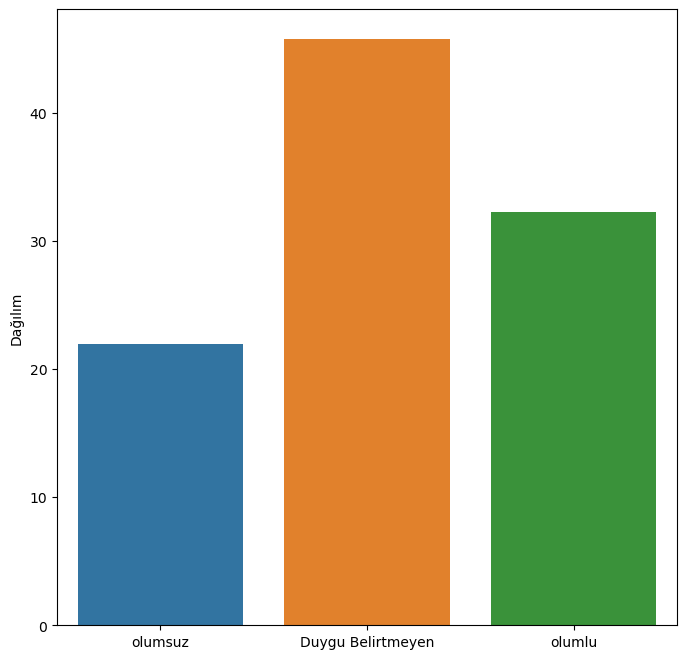

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['olumsuz', 'Duygu Belirtmeyen', 'olumlu'])
ax.set_ylabel("Dağılım")

plt.show()